In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [1829]:
## PREPARING AND CLEANING DATA

In [3]:
test = pd.read_csv('test_titanic.csv')
train = pd.read_csv('train_titanic.csv')
gender = pd.read_csv('gender_submission_titanic.csv')

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
survived = pd.DataFrame(gender['Survived'].value_counts())

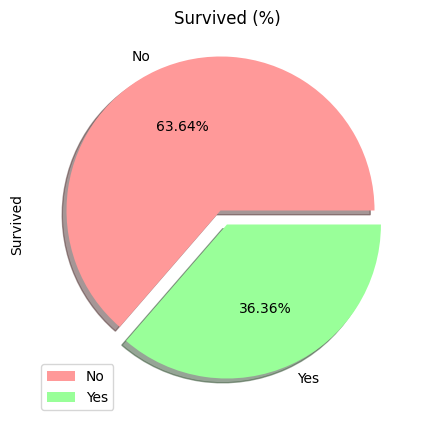

In [8]:
survived.reset_index(inplace= True)
fig, ax = plt.subplots()

# add colors
colors = ['#ff9999','#99ff99']

# only "explode" the 2nd slice
explode = (0.1, 0)

survived.plot(kind = 'pie', y = 'Survived', title = 'Survived (%)', labels = ['No', 'Yes'], autopct= '%1.2f%%', ax=ax, figsize=(5,5), colors=colors, explode = explode, shadow=True)
plt.show()

In [9]:
## notice test data doesn't have surived column like the train data does so we can insert survived from gender into test 
## so both test and train have the same structure of data and share the same columns to maintain consistency

test.insert(1, 'Survived', gender['Survived']) # 1 because we want it to be index 1 column after passenger id to match train data


In [10]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
## splitting

X_train = train.drop('Survived', axis=1)

In [13]:
Y_train = train['Survived']

In [14]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
X_test = test.drop('Survived', axis=1)
Y_test = test['Survived']

In [17]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
Y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [1846]:
## can now compare the features against survived column
## can drop/edit data in columns before comparing or concat

In [19]:
## check for missing values

test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

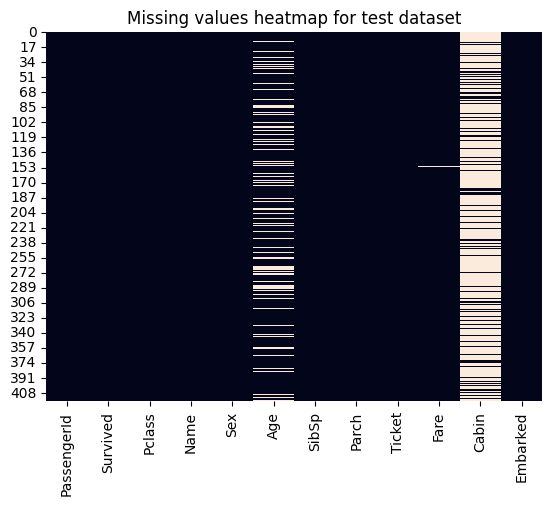

In [20]:
sns.heatmap(test.isnull(), cbar =False)
plt.title("Missing values heatmap for test dataset")
plt.show()

In [1849]:
## in test data: manipulate age, fare and cabin

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

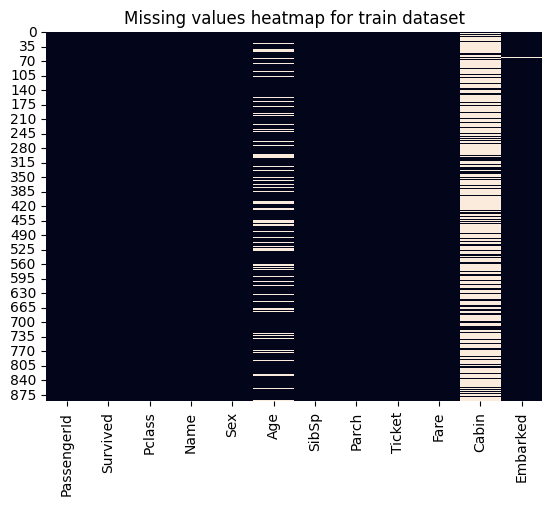

In [22]:
sns.heatmap(train.isnull(), cbar =False)
plt.title("Missing values heatmap for train dataset")
plt.show()

In [1852]:
## in train data: manipulate age, cabin and embarked

In [23]:
## what percentage of age and cabin data is missing?

print('test (Age): %.2f%%' %((test['Age'].isnull().sum()/test.shape[0])*100))
print('test (Cabin): %.2f%%' %((test['Cabin'].isnull().sum()/test.shape[0])*100))
print('test (Fare): %.2f%%' %((test['Fare'].isnull().sum()/train.shape[0])*100))

print('train (Age): %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))
print('train (Cabin): %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))
print('train (Embarked): %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

test (Age): 20.57%
test (Cabin): 78.23%
test (Fare): 0.11%
train (Age): 19.87%
train (Cabin): 77.10%
train (Embarked): 0.22%


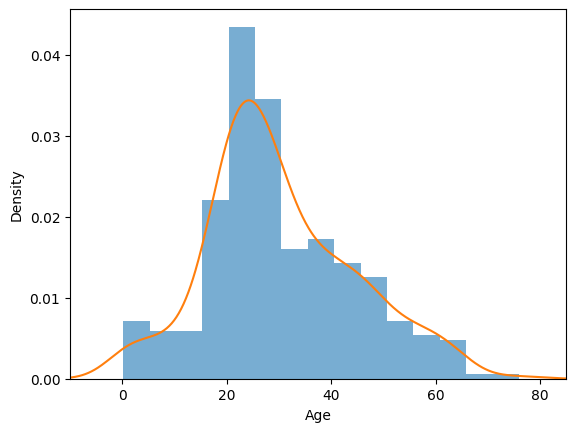

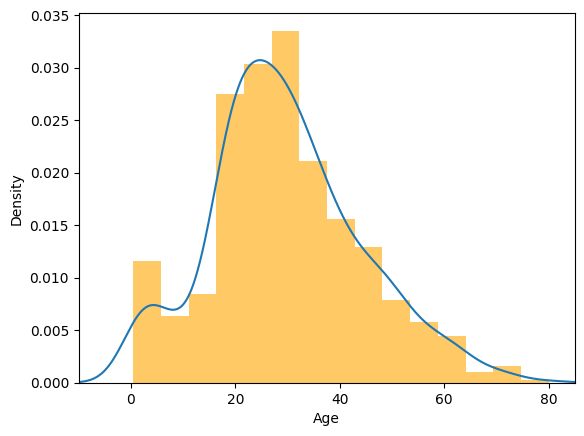

In [24]:
## large percentage of cabin data is missing, therefore can ignore or drop this column as it would not give accurate results in our analysis
## see how age variables look in chart

ax = test['Age'].hist(bins=15, density=True, stacked=True, alpha=0.6)
test["Age"].plot(kind='density')
plt.xlabel('Age')
plt.xlim(-10,85)
plt.show()

ax = train['Age'].hist(bins=15, density=True, stacked=True, alpha=0.6, color = 'orange')
train["Age"].plot(kind='density')
plt.xlabel('Age')
plt.xlim(-10,85)
plt.show()

In [25]:
## skewed to the right - means using the mean age to replace missing values will be biased to giving an age older than desired
## we can use the median instead to replace missing values

# mean age
test_mean_age = test['Age'].mean(skipna=True) # skip na =true means to skip nan values, skip na =false means to include nan values
test_median_age = test['Age'].median(skipna=True)

# median age
train_mean_age = train['Age'].mean(skipna=True) 
train_median_age = train['Age'].median(skipna=True)


print(test_mean_age)
print(test_median_age)
print(train_mean_age)
print(train_median_age)



30.272590361445783
27.0
29.69911764705882
28.0


In [1856]:
## can use 27 to replace missing age values in test data and 28 to replace missing age values in train data

In [26]:
## view how much passengers are paying for fares by range in new column fare category

## create categories for fare values from low to high
test['Fare Category'] = pd.cut(test['Fare'], bins=[0, 7.90, 14.45, 31.28, 120], labels=['Low', 'Low Mid', 'High Mid', 'High'])

In [27]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Category
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Low
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Low Mid
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Low Mid
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Low Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Low Mid
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,High
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Low
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Low Mid


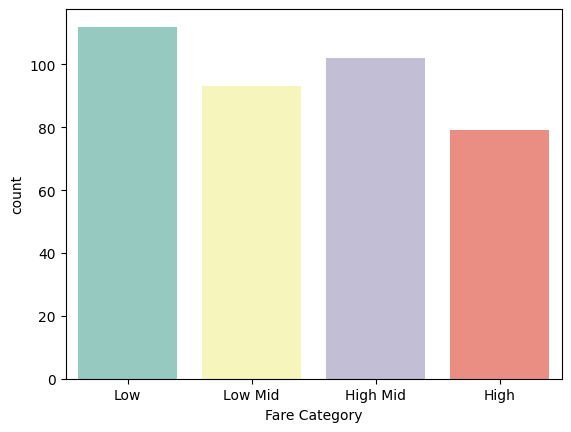

In [28]:
sns.countplot(x= 'Fare Category', data=test,palette='Set3')
plt.show()

In [1860]:
## can replace the missing fare value with low range amount (0-7.90) as it is the most common range passengers paid for fares

In [29]:
# OR calculate average and median fare paid to replace missing value 

test_mean_fare = test['Fare'].mean(skipna=True)
test_median_fare = test['Fare'].median(skipna=True)
print(test_mean_fare)
print(test_median_fare)

35.627188489208635
14.4542


In [1862]:
## replace missing value for fare with 14.45 as it is closer amount to low range as the most common range passengers paid for fares

Passengers embarked at port: C = Cherbourg, Q = Queenstown, S = Southampton
S    270
C    102
Q     46
Name: Embarked, dtype: int64


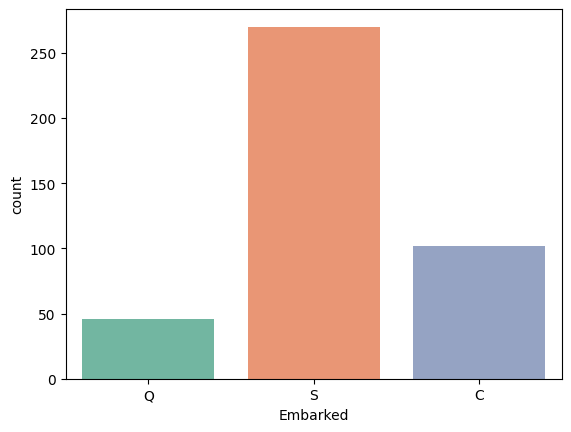

S    644
C    168
Q     77
Name: Embarked, dtype: int64


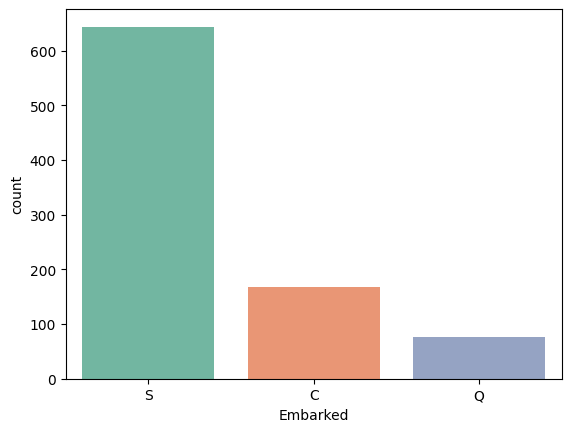

In [30]:
## see how embarked variables look in chart and value counts

print('Passengers embarked at port: C = Cherbourg, Q = Queenstown, S = Southampton')
sns.countplot(x= 'Embarked', data=test, palette='Set2')
print(test['Embarked'].value_counts())
plt.show()

sns.countplot(x= 'Embarked', data=train, palette='Set2')
print(train['Embarked'].value_counts())
plt.show()

In [1864]:
## S is the most common so we can replace the missing values in embarked column as S

In [31]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Category
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Low
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Low Mid
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Low Mid
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Low Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Low Mid
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,High
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Low
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Low Mid


In [32]:
## create new variable called test_data to change missing values and drop columns

test_data = test.drop(columns='Fare Category')

In [33]:
## remove all missing values by filling NaN age and fare with median, dropping cabin column and replacing NaN values in Embarked to S

test_data = test_data.fillna(test_data['Age'].median(skipna=True))
test_data = test_data.fillna(test_data['Fare'].median(skipna=True))
test_data = test_data.drop(columns='Cabin')


In [34]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [35]:
test.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               86
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin            327
Embarked           0
Fare Category     32
dtype: int64

In [36]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1871]:
## no null values remaining in test data

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
## create new variable for train data
## remove all missing values by filling NaN age and fare with median, dropping cabin column and replacing NaN values in Embarked to S

train_data = train.fillna(train['Age'].median(skipna=True))
train_data = train_data.drop(columns='Cabin')
train_data[['Embarked']] = train_data[['Embarked']].replace(to_replace = r'[NaN]', value = str('S'), regex =True) 

## OR train['Embarked'].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
## OR train.Embarked.fillna(train.Embarked.mode()[0], inplace = True) 
## as mode is the most common aka S

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1879]:
## no null values remaining in train data

In [44]:
## concat the two new datasets together

titanic_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [45]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [46]:
## CONVERT CATEGORICAL DATA

## drop passenger ID, name and ticket as it is not relevant to survival

titanic_data.drop('PassengerId', axis=1, inplace=True)
titanic_data.drop('Name', axis=1, inplace=True)
titanic_data.drop('Ticket', axis=1, inplace=True)

In [47]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,27.0,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,27.0,0,0,8.0500,S


In [48]:
## convert sex to numerical data where male = 1, female = 0

titanic_data['Sex'] = np.where(titanic_data['Sex']=='female',0,1)

In [49]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,S
1305,1,1,0,39.0,0,0,108.9000,C
1306,0,3,1,38.5,0,0,7.2500,S
1307,0,3,1,27.0,0,0,8.0500,S


In [50]:
## convert travelling with sibling/spouse and travelling with parent/child becomes travelling alone or not, where travelling alone = 1, travelling with someone = 0

titanic_data['TravelAlone'] = np.where((titanic_data["SibSp"] + titanic_data["Parch"]) > 0, 0, 1)

# if sibsp + parch is more than 0, then replace with 0 since they are not travelling alone 
# otherwise replace with 1 to say they are travelling alone

In [51]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,0
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,0
4,0,3,1,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,S,1
1305,1,1,0,39.0,0,0,108.9000,C,1
1306,0,3,1,38.5,0,0,7.2500,S,1
1307,0,3,1,27.0,0,0,8.0500,S,1


In [52]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

In [53]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,1,0,0,0,1
1305,1,1,0,39.0,0,0,108.9000,1,0,1,0,0
1306,0,3,1,38.5,0,0,7.2500,1,0,0,0,1
1307,0,3,1,27.0,0,0,8.0500,1,0,0,0,1


In [54]:
titanic_data.drop('Embarked_28.0', axis=1, inplace=True)

In [55]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,1,0,0,1
1305,1,1,0,39.0,0,0,108.9000,1,1,0,0
1306,0,3,1,38.5,0,0,7.2500,1,0,0,1
1307,0,3,1,27.0,0,0,8.0500,1,0,0,1


In [56]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   TravelAlone  1309 non-null   int64  
 8   Embarked_C   1309 non-null   uint8  
 9   Embarked_Q   1309 non-null   uint8  
 10  Embarked_S   1309 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 85.8 KB


In [1893]:
## EXPLORATORY DATA ANALYSIS

In [57]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,1,0,0,1
1305,1,1,0,39.0,0,0,108.9000,1,1,0,0
1306,0,3,1,38.5,0,0,7.2500,1,0,0,1
1307,0,3,1,27.0,0,0,8.0500,1,0,0,1


In [58]:
df = pd.DataFrame(titanic_data).value_counts()

In [59]:
def bar_chart(feature):
    Survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    Died = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame({'Female': Survived, 'Male': Died})
    df.index = ['Survived', 'Died']
    df.plot(kind='bar', stacked=False, fig=(10,10), title=feature)

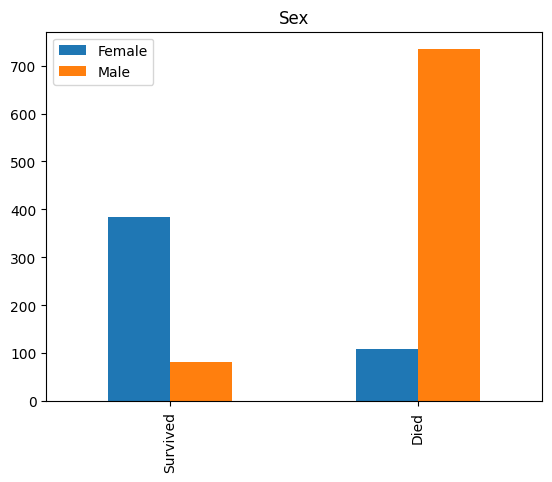

In [60]:
bar_chart('Sex')

In [61]:
def bar_chart(feature):
    Survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    Died = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame({'Female': Survived, 'Male': Died})
    df.index = ['Survived', 'Died']
    df.plot(kind='bar', stacked=True, fig=(10,10), title=feature)

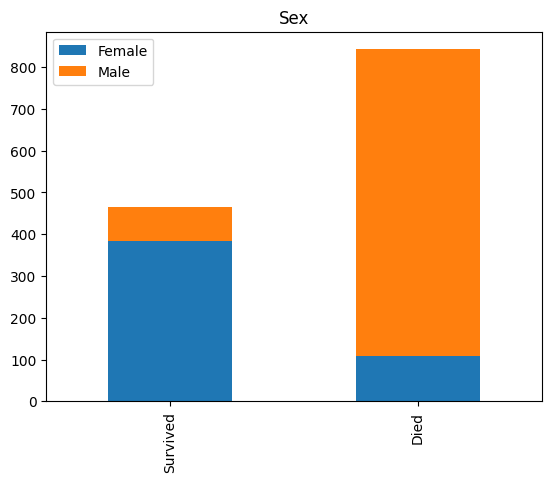

In [62]:
bar_chart('Sex')

In [63]:
def bar_chart(feature):
    Survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    Died = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame({'No': Survived, 'Yes': Died})
    df.index = ['Survived', 'Died']
    df.plot(kind='bar', stacked=True, fig=(10,10), title=feature)

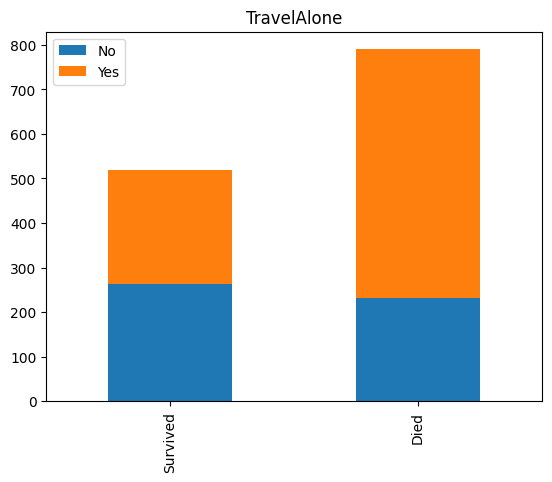

In [64]:
bar_chart('TravelAlone')

In [65]:
def bar_chart(feature):
    Survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    Died = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame({'No': Survived, 'Yes': Died})
    df.index = ['Survived', 'Died']
    df.plot(kind='bar', stacked=True, fig=(10,10), title=feature)

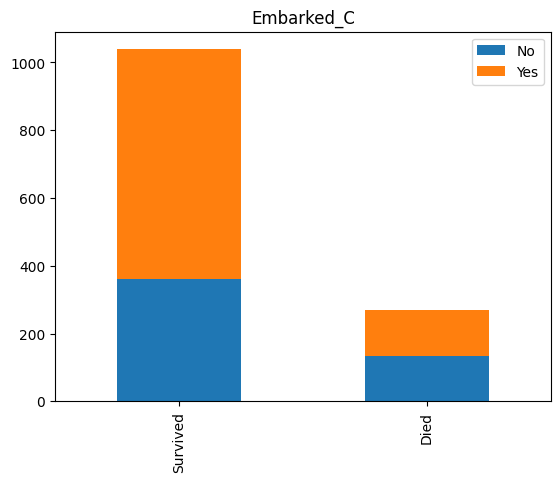

In [66]:
bar_chart('Embarked_C')

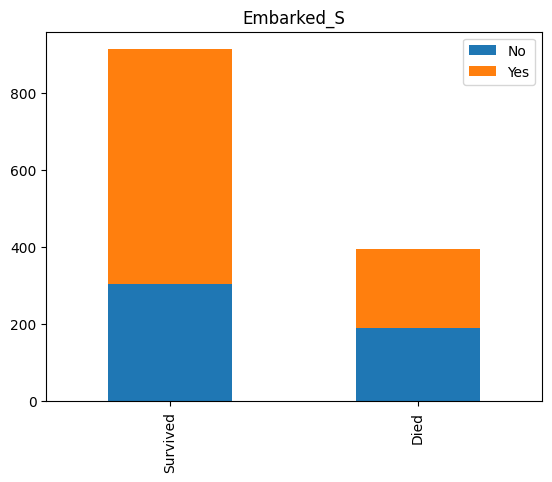

In [67]:
bar_chart('Embarked_S')

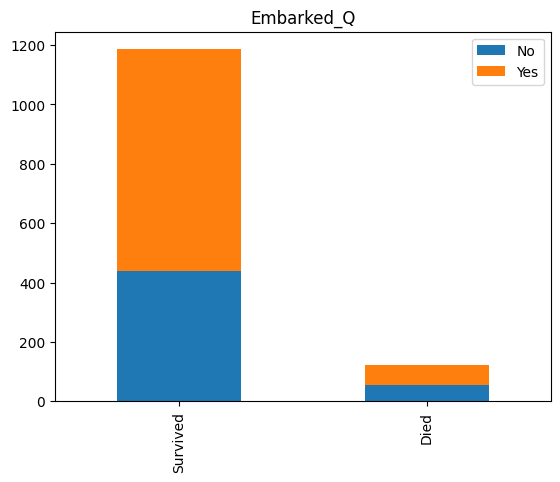

In [68]:
bar_chart('Embarked_Q')

In [ ]:
## in train data: manipulate age, cabin and embarked

In [ ]:
## Box plot

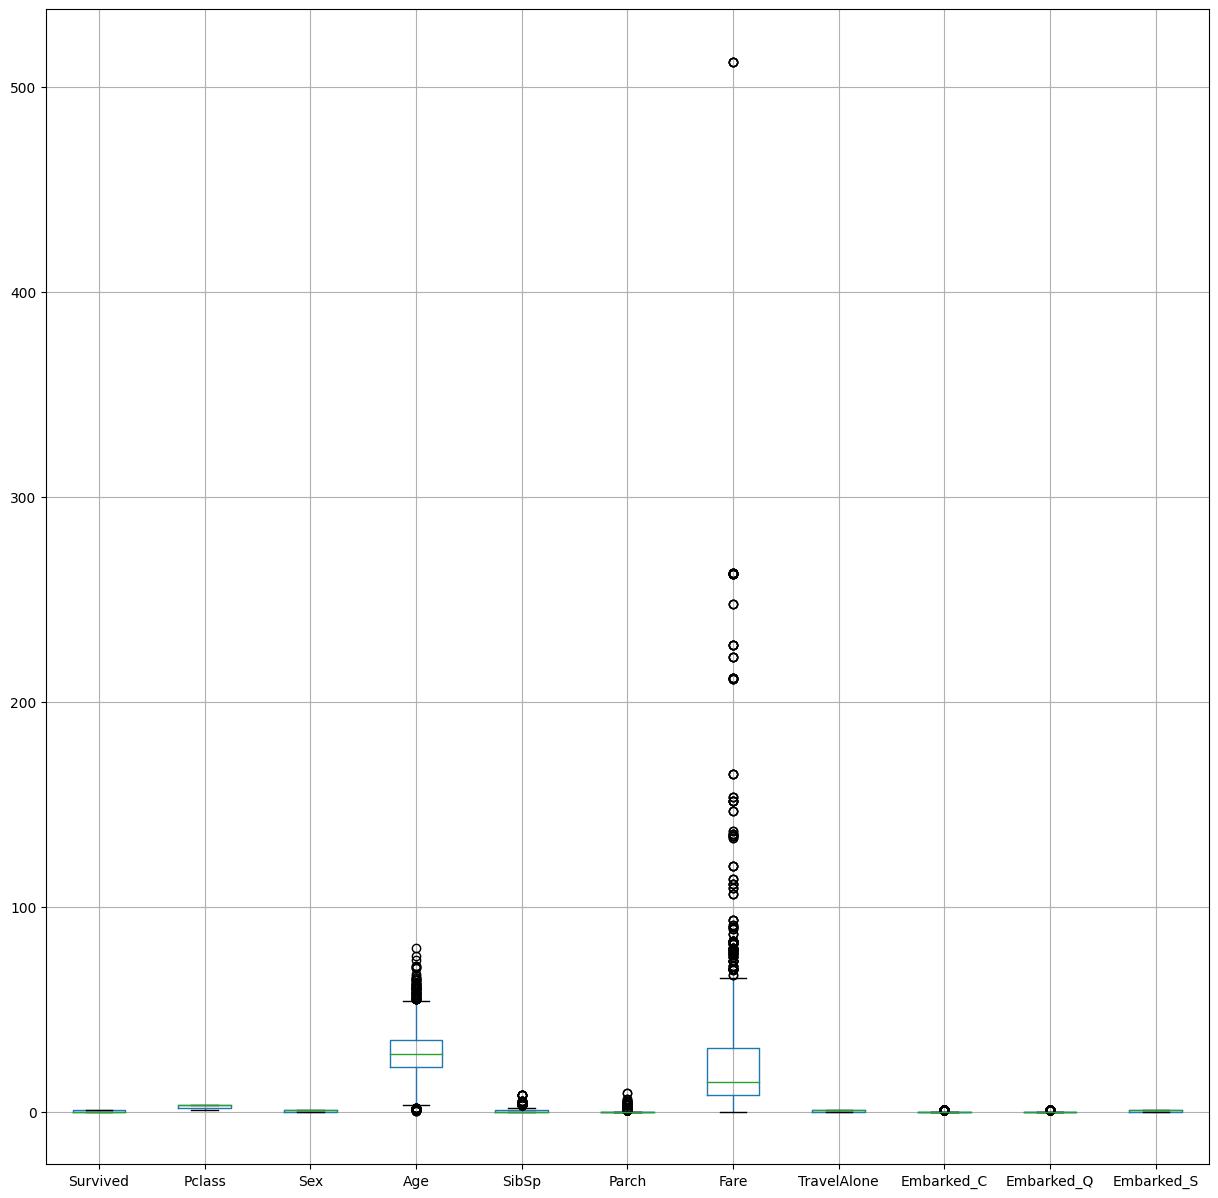

In [69]:
titanic_data.boxplot(figsize=(15,15))
plt.show()

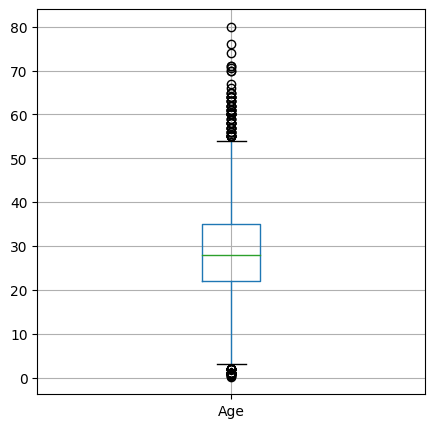

In [70]:
titanic_data.boxplot(column='Age', figsize=(5,5))
plt.show()

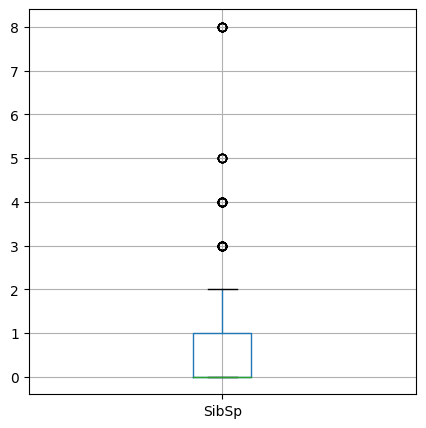

In [71]:
titanic_data.boxplot(column='SibSp', figsize=(5,5))
plt.show()

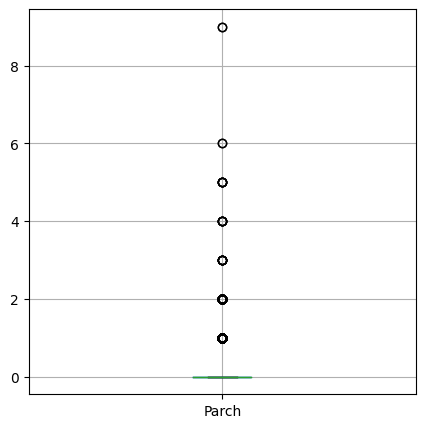

In [72]:
titanic_data.boxplot(column='Parch', figsize=(5,5))
plt.show()

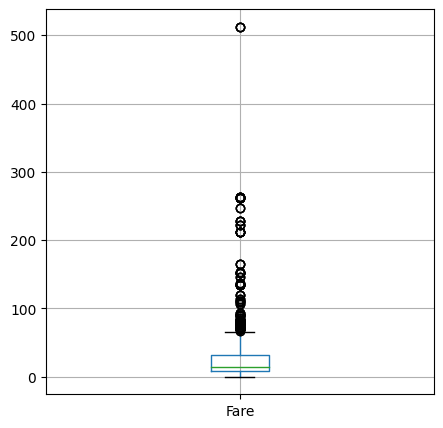

In [73]:
titanic_data.boxplot(column='Fare', figsize=(5,5))
plt.show()

In [74]:
## correlation matrix

columns = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'TravelAlone','Embarked_C', 'Embarked_Q', 'Embarked_S'] 
corr_matrix = titanic_data[columns].corr() ## or just corr_matrix = titanic_data.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.264710,-0.688371,-0.042342,0.002370,0.108919,0.233639,-0.216299,0.121156,0.040950,-0.137103
Pclass,-0.264710,1.000000,0.124617,-0.380274,0.060832,0.018322,-0.558552,0.147393,-0.269658,0.230491,0.096335
Sex,-0.688371,0.124617,1.000000,0.052928,-0.109609,-0.213125,-0.185552,0.284537,-0.066564,-0.088651,0.119504
Age,-0.042342,-0.380274,0.052928,1.000000,-0.188920,-0.125677,0.180295,0.105167,0.074627,-0.034336,-0.049259
SibSp,0.002370,0.060832,-0.109609,-0.188920,1.000000,0.373587,0.160268,-0.591077,-0.048396,-0.048678,0.075198
Parch,0.108919,0.018322,-0.213125,-0.125677,0.373587,1.000000,0.221562,-0.549022,-0.008635,-0.100943,0.073258
Fare,0.233639,-0.558552,-0.185552,0.180295,0.160268,0.221562,1.000000,-0.274900,0.286287,-0.130023,-0.172715
TravelAlone,-0.216299,0.147393,0.284537,0.105167,-0.591077,-0.549022,-0.274900,1.000000,-0.107874,0.127214,0.011527
Embarked_C,0.121156,-0.269658,-0.066564,0.074627,-0.048396,-0.008635,0.286287,-0.107874,1.000000,-0.164166,-0.775441
Embarked_Q,0.040950,0.230491,-0.088651,-0.034336,-0.048678,-0.100943,-0.130023,0.127214,-0.164166,1.000000,-0.489874


<AxesSubplot: >

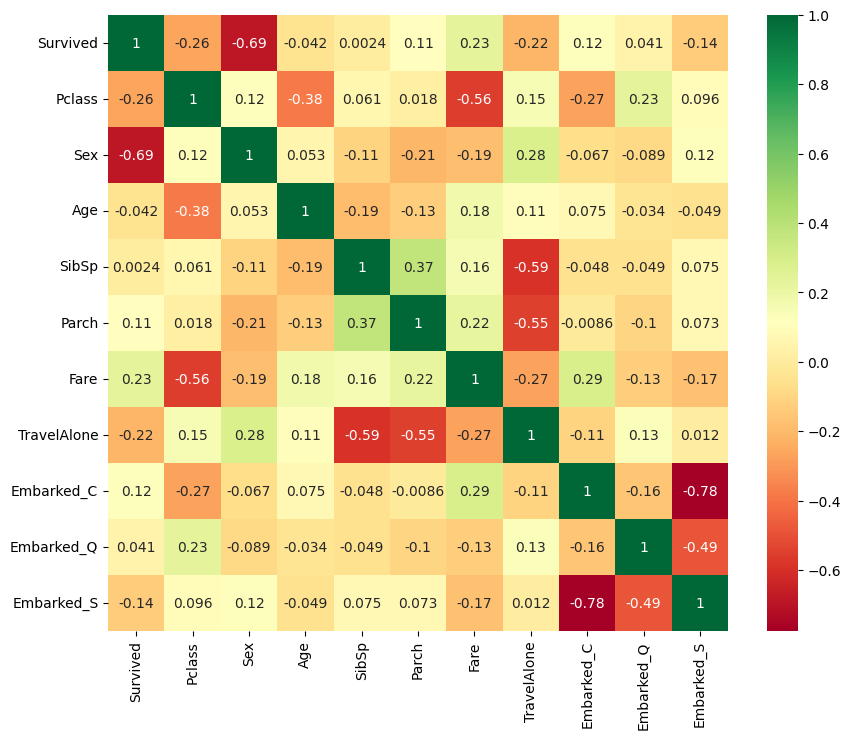

In [75]:
## heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

In [76]:
columns1 = ['Survived','Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 
corr_matrix = titanic_data[columns1].corr()

<AxesSubplot: >

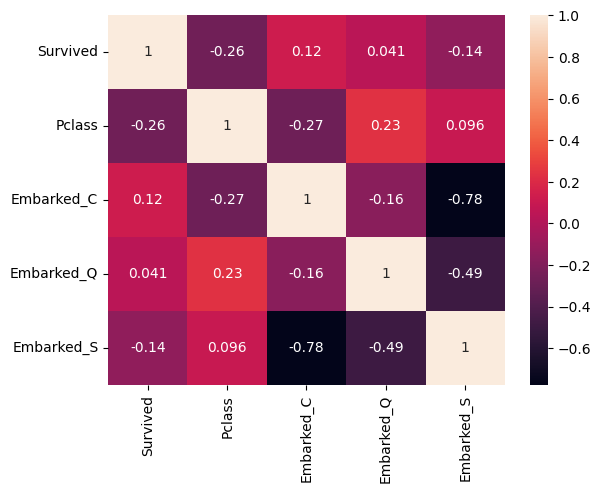

In [77]:
## heatmap 

sns.heatmap(corr_matrix, annot=True)

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

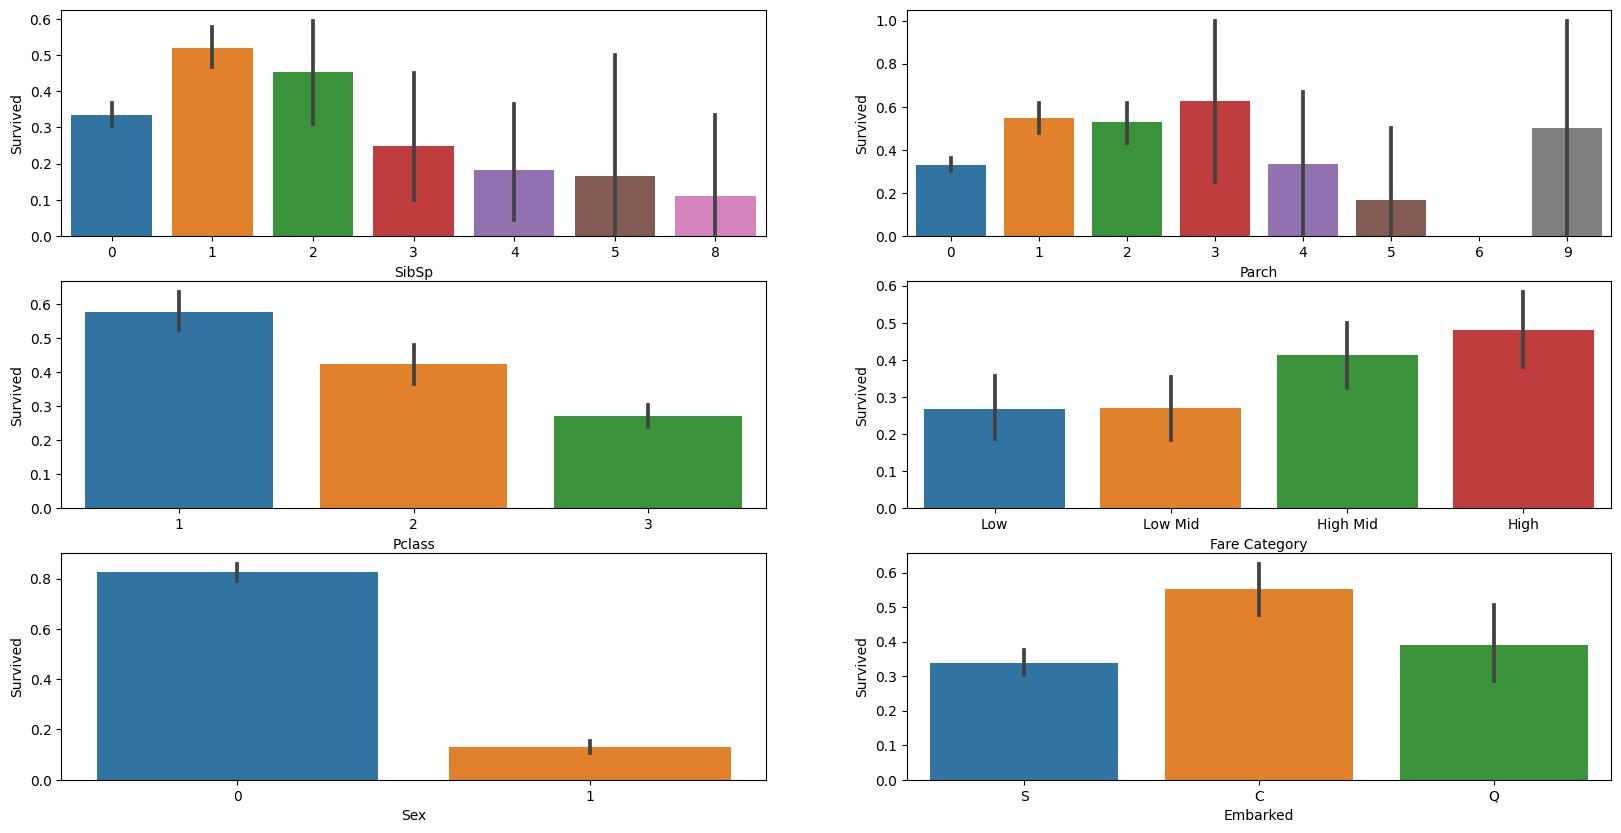

In [78]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'SibSp', y = 'Survived', data = titanic_data)
plt.subplot(322)
sns.barplot(x = 'Parch', y = 'Survived', data = titanic_data)
plt.subplot(323)
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_data)
## plt.subplot(324)
## sns.barplot(x = 'TravelAlone', y = 'Survived', data = titanic_data)
plt.subplot(324)
sns.barplot(x = 'Fare Category', y = 'Survived', data = test)
plt.subplot(325)
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_data)
plt.subplot(326)
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

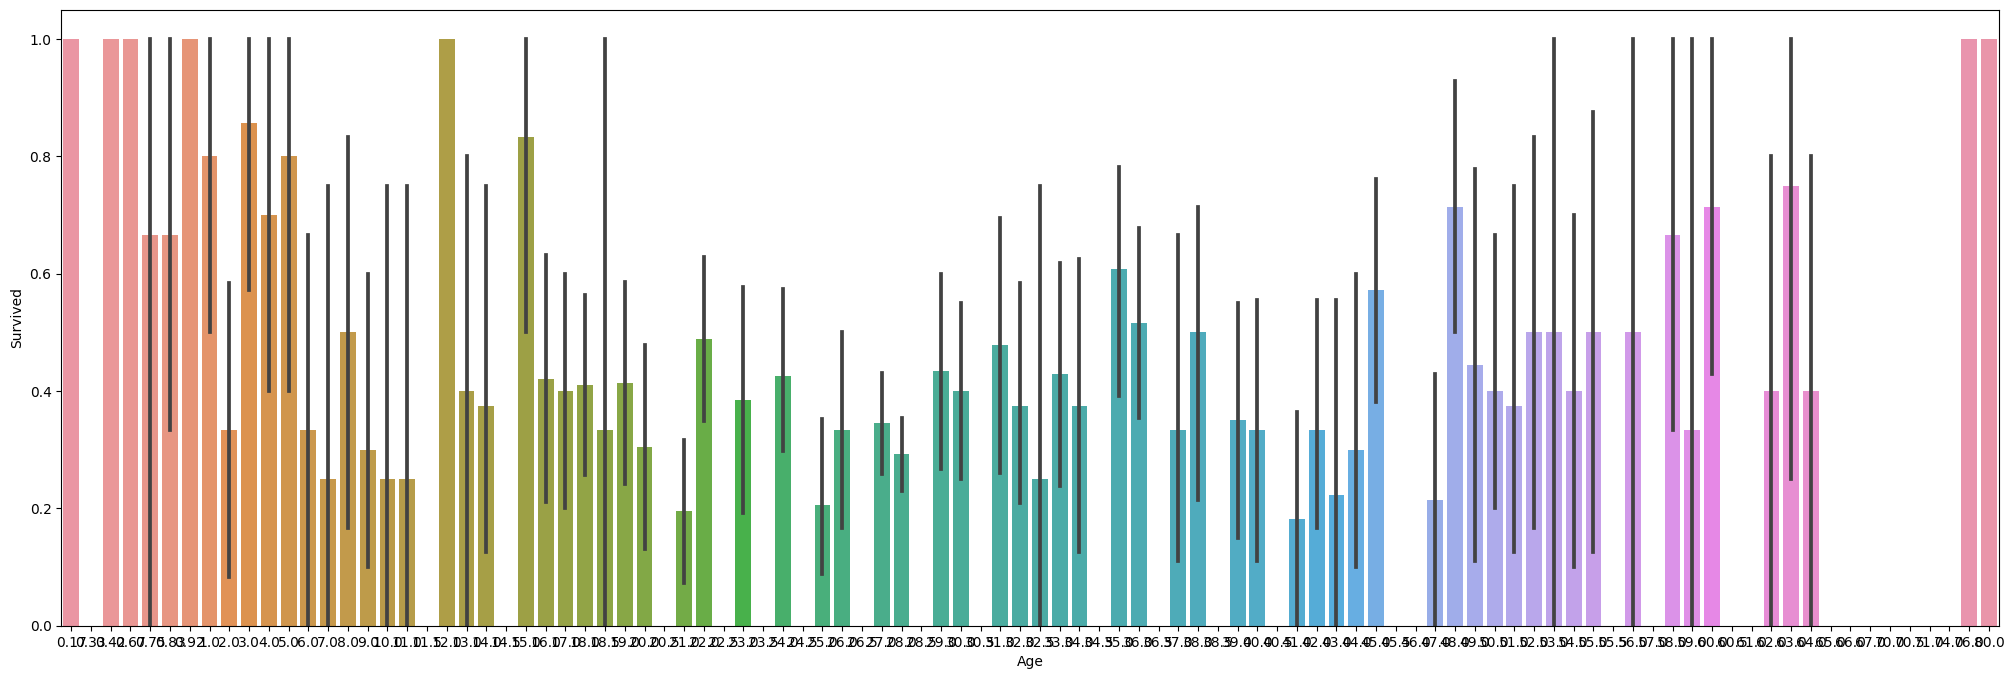

In [79]:
plt.figure(figsize=(25,8))
sns.barplot(x = 'Age', y = 'Survived', data = titanic_data)
plt.show()

In [80]:
## LOGISTIC REGRESSION

titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,27.0,0,0,8.0500,1,0,0,1
1305,1,1,0,39.0,0,0,108.9000,1,1,0,0
1306,0,3,1,38.5,0,0,7.2500,1,0,0,1
1307,0,3,1,27.0,0,0,8.0500,1,0,0,1


In [118]:
## confirm data type is integers and no null values

titanic_data = titanic_data.astype(int)

In [104]:
## split the data into independent and dependent variables (x and y) 
## selecting only the last column as Y

## X = titanic_data.drop('Survived', axis=1)
## Y = titanic_data.iloc[:,0]
# ## this originally came up with error because used 1 instead of 0 >> fixed now

In [119]:
## split the data into independent and dependent variables (x and y) 
## selecting only the last column as Y

X = titanic_data.drop('Survived', axis=1).values
Y = titanic_data['Survived'].values

In [120]:
## train, test and split data first by training 70%, testing 30%, then change to training 30%, testing 70%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=32)

In [121]:
## train the logistic regression 

model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
388,0,0
389,0,0
390,0,0
391,1,1


In [123]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(Y_test, pred_LR)

## confusion matrix
conf_mat = confusion_matrix(Y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)

0.8524173027989822
[[214  21]
 [ 37 121]]


In [129]:
## split the data into independent and dependent variables (x and y) 
## selecting only the last column as Y

X = titanic_data.drop('Survived', axis=1).values
Y = titanic_data['Survived'].values

In [130]:
## split the data into independent and dependent variables (x and y) 
## selecting only the last column as Y

X = titanic_data.drop('Survived', axis=1).values
Y = titanic_data['Survived'].values

In [131]:
## train, test and split data first by training 70%, testing 30%, then change to training 30%, testing 70%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.7, random_state=32)

In [132]:
## train the logistic regression 

model_LR2 = LogisticRegression()
model_LR2.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
##  make the prediction
pred_LR2 = model_LR2.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_LR2})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
912,1,0
913,0,0
914,0,0
915,1,0


In [134]:
## evaluate the model accuracy
accuracy_LR2 = accuracy_score(Y_test, pred_LR2)

## confusion matrix
conf_mat2 = confusion_matrix(Y_test, pred_LR2)

print(accuracy_LR2)
print(conf_mat2)

0.861504907306434
[[514  50]
 [ 77 276]]


In [135]:
## view pred_LR arrays

pred_LR

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [136]:
pred_LR2

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [125]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [127]:
## predict the test set
pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_NB})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
388,0,0
389,0,0
390,0,0
391,1,1


In [128]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(Y_test, pred_NB)
conf_mat_NB = confusion_matrix(Y_test, pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.8269720101781171
[[200  35]
 [ 33 125]]
